<a href="https://colab.research.google.com/github/akash620123/akash620123/blob/main/Diabetes_Classification_Akash_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'predict-diabities:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F2619659%2F4476380%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240208%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240208T084616Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D6ab2bf263bfc09eead42f862466ad360ae92d696f7d6f1150e196fba2f7e6b97a55d88b73e6693d9db196e6f07fc3cafef9276614b56aa82bcbe7d7bce08ce9e65f6e5e47dfd8c47836e988220d667b33a8bff98bbd6d2056ff4ee6a00f1c8ea1fe7c193fe2b4e34a3db45f7cea99b08b20a790057f9e7e30dec45bc0d2460e747e5ccc10bcb699171fe002f272e88bc0adcfa506afcc54f903f929e5bec9878390d4e5d55abc1fcc8c78db7bda98ae2d9050b7887b17ac217046a94011f915a5ffb9f62d1f2b35b351b533417b6b0a08fdc0edc8c179d31a9212a952f1f7663e2c5663ea306407dfee958a492db32b168f2add0f82d11718bf3cede58d702fc'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 9128 bytes downloaded
Downloaded and uncompressed: predict-diabities
Data source import complete.


In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/predict-diabities/diabetes.csv


In [3]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd

In [4]:
df = pd.read_csv('/kaggle/input/predict-diabities/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: >

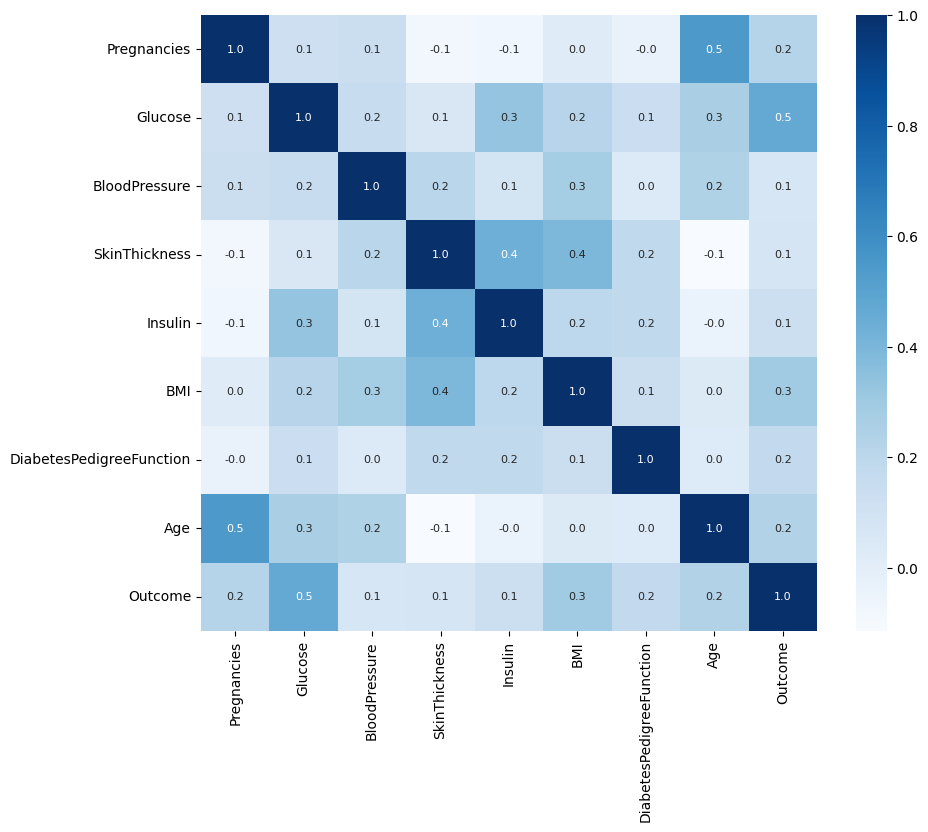

In [8]:
correlation = df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

In [9]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Handling outliers in X

In [10]:
columns_names = X.columns

In [11]:
# that function suppress for any outlier
def outlier_thresholds(dataframe,variable,q1=0.25,q3=0.75):
    quartile1 = dataframe[variable].quantile(q1)
    quartile3 = dataframe[variable].quantile(q3)
    quantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * quantile_range
    low_limit = quartile1 - 1.5 * quantile_range
    return up_limit, low_limit
# if has any outlier we make replace with it
def replace_with_outlier(dataframe,variable):
    up_limit, low_limit = outlier_thresholds(dataframe,variable)
    dataframe.loc[dataframe[variable] < low_limit, variable] = low_limit
    dataframe.loc[dataframe[variable] > up_limit, variable] = up_limit

# check outlier function
def check_outlier(dataframe,col_name):
    up_limit, low_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False

In [12]:
# Check outliers
for col in columns_names:
    print((col))
    print(check_outlier(X,col))
    print('================')

Pregnancies
True
Glucose
True
BloodPressure
True
SkinThickness
True
Insulin
True
BMI
True
DiabetesPedigreeFunction
True
Age
True


In [13]:
# handel outliers
# col1 = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness']
for col in columns_names:
    # outlier_thresholds(df,col)
    replace_with_outlier(X,col)

In [14]:
# Check outliers
for col in columns_names:
    print((col))
    print(check_outlier(X,col))
    print('================')

Pregnancies
False
Glucose
False
BloodPressure
False
SkinThickness
False
Insulin
False
BMI
False
DiabetesPedigreeFunction
False
Age
False


# Check imbalanced Outcome

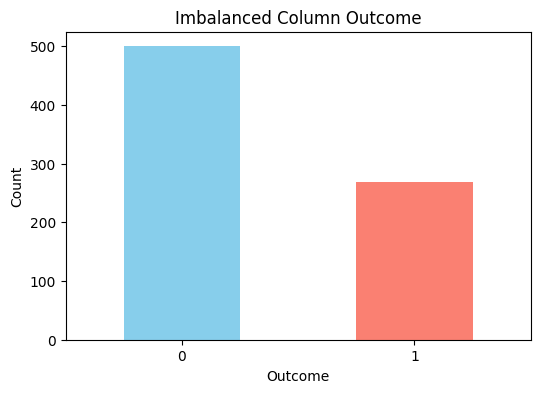

In [15]:
plt.figure(figsize=(6, 4))
df['Outcome'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Imbalanced Column Outcome')
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

In [16]:
from imblearn.over_sampling import SMOTE

In [17]:
x_res, y_res = SMOTE().fit_resample(X, y)

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_val, y_train, y_val = train_test_split(x_res, y_res, test_size=0.2, random_state=42)

# Feature Scaling

In [20]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_val= scaler.fit_transform(X_val)

# Create LogisticRegression model

In [21]:
from sklearn.linear_model import LogisticRegression

In [22]:
log_model = LogisticRegression()
log_model.fit(X_train, y_train)
ypred1 = log_model.predict(X_val)

In [23]:
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score

In [24]:
acc0 = roc_auc_score(y_val, ypred1)
print('roc_auc_score: ', acc0)
acc1 = accuracy_score(y_val, ypred1)
print('accuracy_score: ', acc1)
acc2 = precision_score(y_val, ypred1)
print('precision_score: ', acc2)
acc3 = recall_score(y_val, ypred1)
print('recall_score: ', acc3)
acc4 = f1_score(y_val, ypred1)
print('f1_score: ', acc4)

roc_auc_score:  0.7504750475047505
accuracy_score:  0.75
precision_score:  0.7802197802197802
recall_score:  0.7029702970297029
f1_score:  0.7395833333333333


# Create SVC model

In [25]:
from sklearn.svm import SVC

In [26]:
svc_model = SVC()
svc_model.fit(X_train, y_train)
ypred2 = svc_model.predict(X_val)

In [27]:
acc0 = roc_auc_score(y_val, ypred2)
print('roc_auc_score: ', acc0)
acc1 = accuracy_score(y_val, ypred2)
print('accuracy_score: ', acc1)
acc2 = precision_score(y_val, ypred2)
print('precision_score: ', acc2)
acc3 = recall_score(y_val, ypred2)
print('recall_score: ', acc3)
acc4 = f1_score(y_val, ypred2)
print('f1_score: ', acc4)

roc_auc_score:  0.7403740374037403
accuracy_score:  0.74
precision_score:  0.7634408602150538
recall_score:  0.7029702970297029
f1_score:  0.731958762886598


# Create RandomForestClassifier model

In [28]:
from sklearn.ensemble import RandomForestClassifier

In [29]:
rfc_model = RandomForestClassifier()
rfc_model.fit(X_train, y_train)
ypred3 = rfc_model.predict(X_val)

In [30]:
acc0 = roc_auc_score(y_val, ypred3)
print('roc_auc_score: ', acc0)
acc1 = accuracy_score(y_val, ypred3)
print('accuracy_score: ', acc1)
acc2 = precision_score(y_val, ypred3)
print('precision_score: ', acc2)
acc3 = recall_score(y_val, ypred3)
print('recall_score: ', acc3)
acc4 = f1_score(y_val, ypred3)
print('f1_score: ', acc4)

roc_auc_score:  0.7704770477047704
accuracy_score:  0.77
precision_score:  0.8021978021978022
recall_score:  0.7227722772277227
f1_score:  0.7604166666666667


# Create XGBClassifier model

In [31]:
from xgboost import XGBClassifier

In [32]:
xgc_model = XGBClassifier()
xgc_model.fit(X_train, y_train)
ypred4 = xgc_model.predict(X_val)

In [33]:
acc0 = roc_auc_score(y_val, ypred4)
print('roc_auc_score: ', acc0)
acc1 = accuracy_score(y_val, ypred4)
print('accuracy_score: ', acc1)
acc2 = precision_score(y_val, ypred4)
print('precision_score: ', acc2)
acc3 = recall_score(y_val, ypred4)
print('recall_score: ', acc3)
acc4 = f1_score(y_val, ypred4)
print('f1_score: ', acc4)

roc_auc_score:  0.7653265326532654
accuracy_score:  0.765
precision_score:  0.7872340425531915
recall_score:  0.7326732673267327
f1_score:  0.7589743589743589


In [34]:
models_acc = pd.DataFrame({'Models': ['LogisticRegression', 'SVC', 'RandomForestClassifier', 'XGBClassifier'],
                           'roc_auc_score': [roc_auc_score(y_val, ypred1),
                                             roc_auc_score(y_val, ypred2),
                                             roc_auc_score(y_val, ypred3),
                                             roc_auc_score(y_val, ypred4)
                                             ],
                           'accuracy_score': [accuracy_score(y_val, ypred1),
                                              accuracy_score(y_val, ypred2),
                                              accuracy_score(y_val, ypred3),
                                              accuracy_score(y_val, ypred4)
                                              ],
                           'precision_score': [precision_score(y_val, ypred1),
                                              precision_score(y_val, ypred2),
                                              precision_score(y_val, ypred3),
                                              precision_score(y_val, ypred4)
                                              ],
                           'recall_score':    [recall_score(y_val, ypred1),
                                              recall_score(y_val, ypred2),
                                              recall_score(y_val, ypred3),
                                              recall_score(y_val, ypred4)
                                              ],
                           'f1_score':        [f1_score(y_val, ypred1),
                                              f1_score(y_val, ypred2),
                                              f1_score(y_val, ypred3),
                                              f1_score(y_val, ypred4)
                                              ]
                          })

models_acc

,Models,roc_auc_score,accuracy_score,precision_score,recall_score,f1_score
0,LogisticRegression,0.750475,0.750,0.780220,0.702970,0.739583
1,SVC,0.740374,0.740,0.763441,0.702970,0.731959
2,RandomForestClassifier,0.770477,0.770,0.802198,0.722772,0.760417
3,XGBClassifier,0.765327,0.765,0.787234,0.732673,0.758974
